<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/DerbyDellaMadonnina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'inter-derbies.xlsx'
search_path = '/content/drive/My Drive/Datasets/Soccer'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [3]:
# Importing and displaying the last 10 derbies played:
inter = pd.ExcelFile(file)
derby = pd.read_excel(inter, 'Derby della Madonnina')
derby.tail(10)

,Season,Competition,Date,Home team,Score A,Score B,Away team,Referee,City/Country of origin
229,2021–22,Serie A,2022-02-05,Inter,1,2,Milan,Guida,Torre Annunziata
230,2021–22,Coppa Italia SF,2022-03-01,Milan,0,0,Inter,Mariani,Aprilia
231,2021–22,Coppa Italia SF,2022-04-19,Inter,3,0,Milan,Mariani,Aprilia
232,2022–23,Serie A,2022-09-03,Milan,3,2,Inter,Chiffi,Padova
233,2022–23,Supercoppa Italiana,2023-01-18,Milan,0,3,Inter,Maresca,Napoli
234,2022–23,Serie A,2023-02-05,Inter,1,0,Milan,Massa,Imperia
235,2022–23,UEFA Champions League SF,2023-05-10,Milan,0,2,Inter,Gil Manzano,Spain
236,2022–23,UEFA Champions League SF,2023-05-16,Inter,1,0,Milan,Turpin,France
237,2023–24,Serie A,2023-09-16,Inter,5,1,Milan,Sozza,Seregno
238,2023–24,Serie A,2024-04-22,Milan,1,2,Inter,Colombo,Como


In [4]:
# Displaying the number of rows and columns in the dataset:
derby.shape

(239, 9)

# **Plotting basic column data**

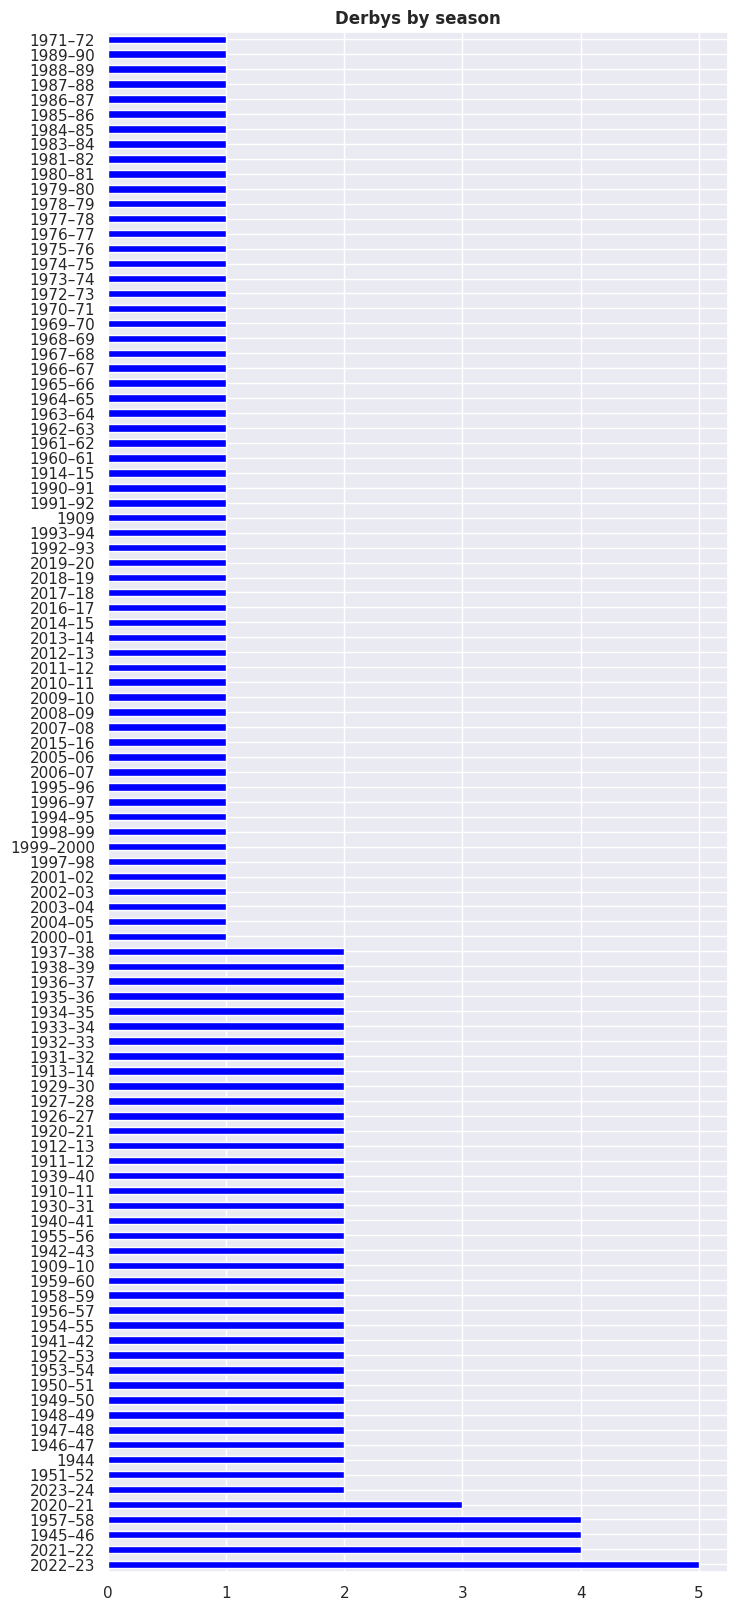

In [5]:
# Displaying derbys by season:
derby['Season'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Derbys by season', fontweight = 'bold')
plt.show()

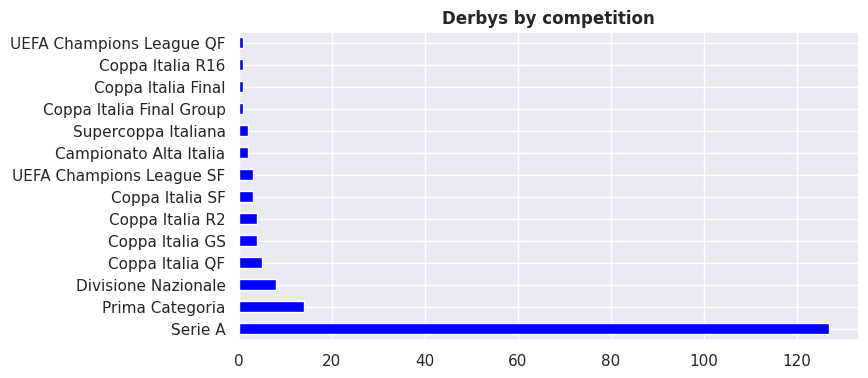

In [6]:
# Displaying derbys by competition:
derby['Competition'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Derbys by competition', fontweight = 'bold')
plt.show()

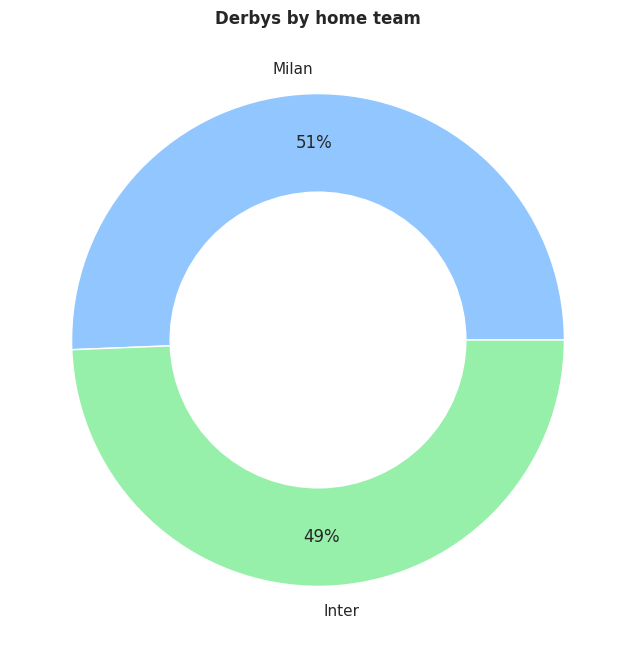

In [7]:
# Displaying derbys by home team:
derby['Home team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by home team', fontweight = 'bold')
plt.show()

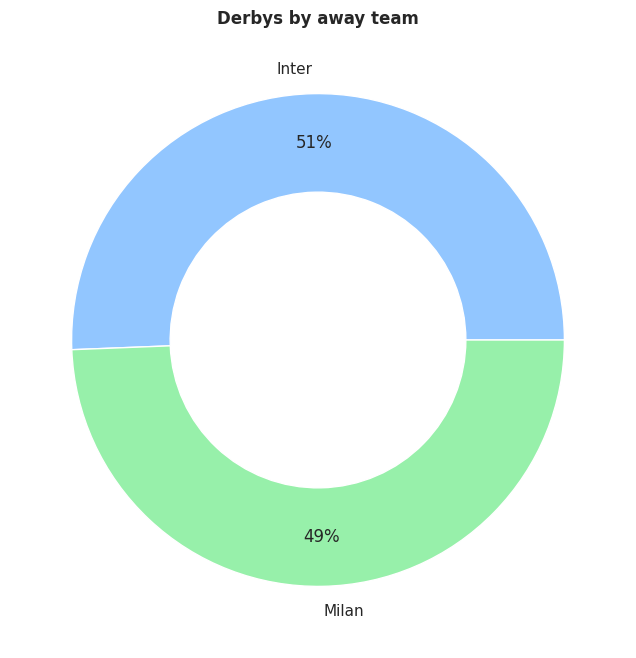

In [8]:
# Displaying derbys by away team:
derby['Away team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by away team', fontweight = 'bold')
plt.show()

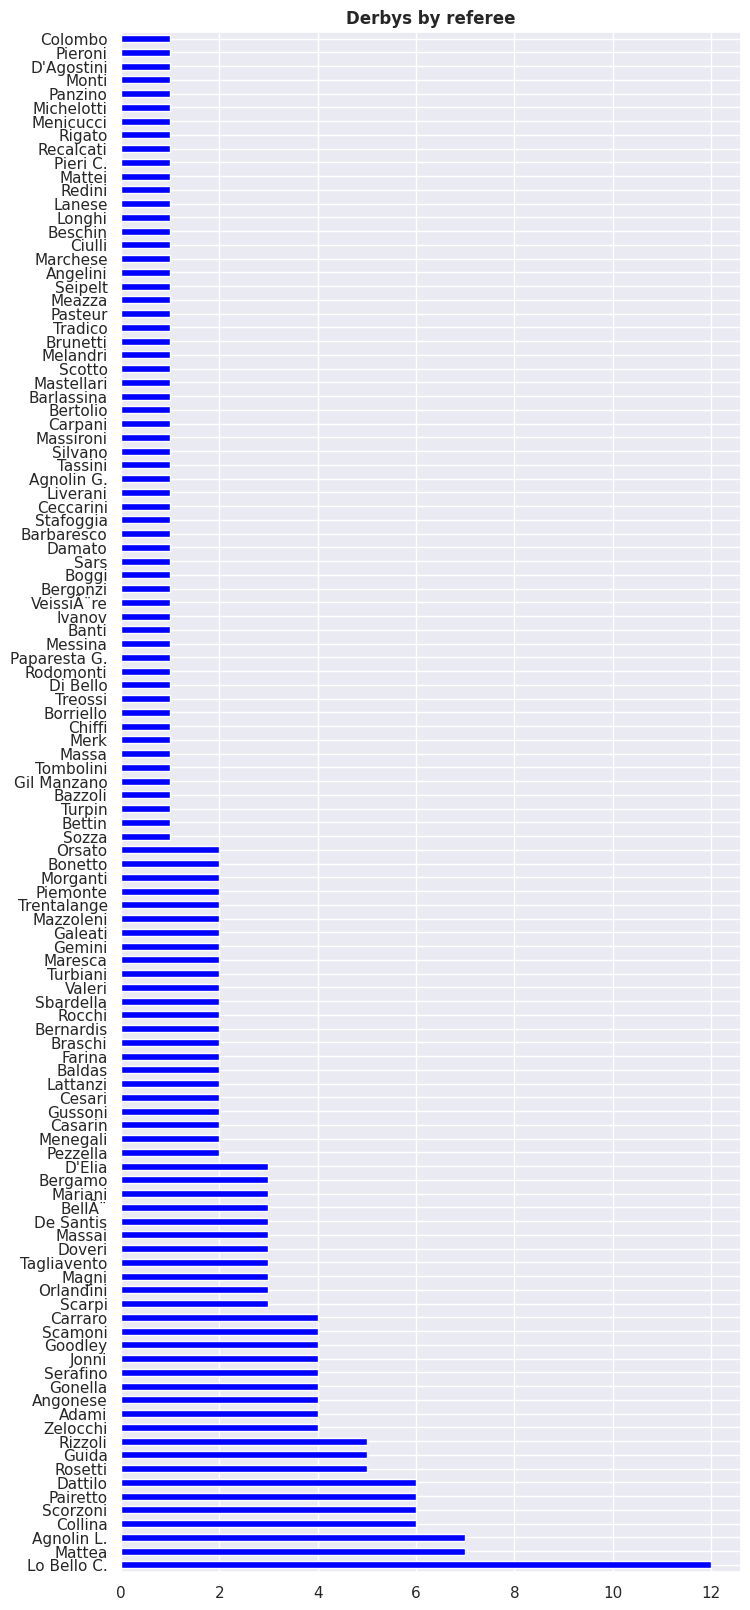

In [9]:
# Displaying derbys by referee:
derby['Referee'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Derbys by referee', fontweight = 'bold')
plt.show()

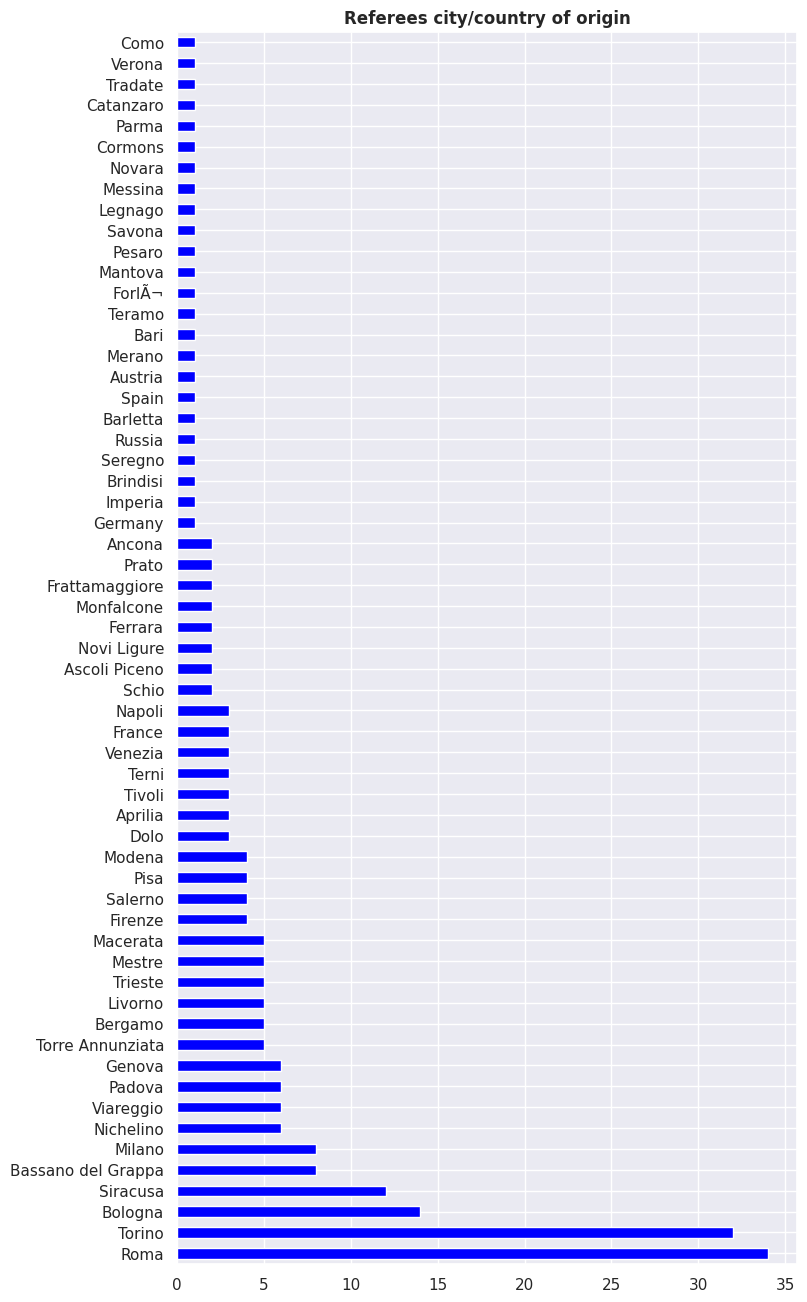

In [10]:
# Displaying referee's city/country of origin:
derby['City/Country of origin'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Referees city/country of origin', fontweight = 'bold')
plt.show()

# **Generating new table columns**

In [11]:
# Classifying the derby winners:
def who_won(row):
  home_team = row['Home team']
  away_team = row['Away team']
  home_score = row['Score A']
  away_score = row['Score B']

  if home_team == 'Inter' and home_score > away_score or away_team == 'Inter' and away_score > home_score:
      return 'Inter'
  elif home_team == 'Milan' and home_score > away_score or away_team == 'Milan' and away_score > home_score:
      return 'Milan'
  else:
      return 'Draw'

# Applying the function above on a column of the dataset and generating a new column as result:
derby['Who won'] = derby.apply(who_won, axis=1)
derby.head()

,Season,Competition,Date,Home team,Score A,Score B,Away team,Referee,City/Country of origin,Who won
0,1909,Prima Categoria,1909-01-10,Milan,3,2,Inter,Goodley,Torino,Milan
1,1909–10,Prima Categoria,1910-02-06,Milan,0,5,Inter,Goodley,Torino,Inter
2,1909–10,Prima Categoria,1910-02-27,Inter,5,1,Milan,Recalcati,Milano,Inter
3,1910–11,Prima Categoria,1911-02-05,Inter,0,2,Milan,Meazza,Milano,Milan
4,1910–11,Prima Categoria,1911-04-30,Milan,6,3,Inter,Magni,Milano,Milan


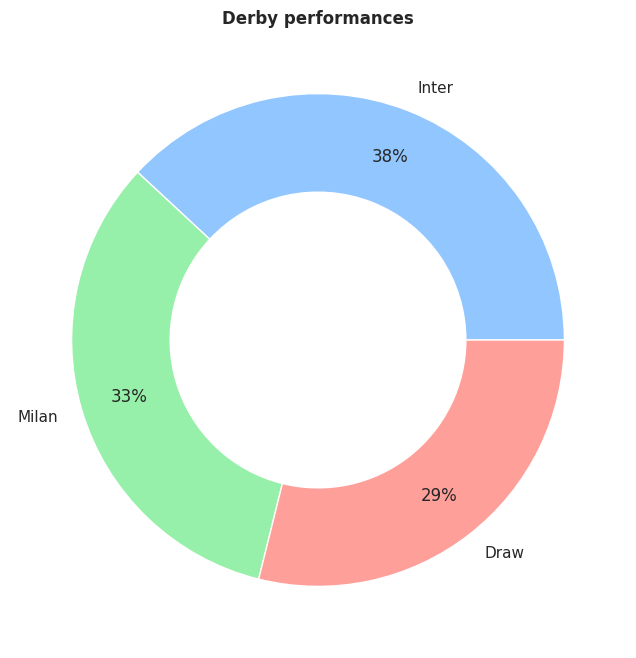

In [12]:
# Displaying who won the derby the most:
derby['Who won'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derby performances', fontweight = 'bold')
plt.show()